In [13]:
# import libraries
import pandas as pd
import numpy as np
import math
import datetime
from datetime import timedelta
from arch import arch_model
from scipy.stats import norm

import scipy.stats

# charting libraries
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
import datetime as dt

import pandas_datareader.data as web

from arch import arch_model

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()


In [40]:
# Specify GARCH model assumptions
basic_gm = arch_model(returns, p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5159.583236619886
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5156.097598740948
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5152.299896533299
Iteration:      4,   Func. Count:     31,   Neg. LLF: 5146.4753110022275
Iteration:      5,   Func. Count:     38,   Neg. LLF: 5143.863365464941
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5143.020952324405
Iteration:      7,   Func. Count:     52,   Neg. LLF: 5142.241045945975
Iteration:      8,   Func. Count:     60,   Neg. LLF: 5142.07137126528
Iteration:      9,   Func. Count:     67,   Neg. LLF: 5141.416648595367
Iteration:     10,   Func. Count:     73,   Neg. LLF: 5141.392119620785
Iteration:     11,   Func. Count:     79,   Neg. LLF: 5141.390235770439
Iteration:     12,   Func. Count:     85,   Neg. LLF: 5141.390230506618
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5141.39023050538
            Iterations: 12
 

In [41]:
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -5141.39
Distribution:                  Normal   AIC:                           10290.8
Method:            Maximum Likelihood   BIC:                           10315.4
                                        No. Observations:                 3520
Date:                Fri, Apr 10 2020   Df Residuals:                     3516
Time:                        11:16:38   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0531  1.487e-02      3.569  3.581e-04 [2.

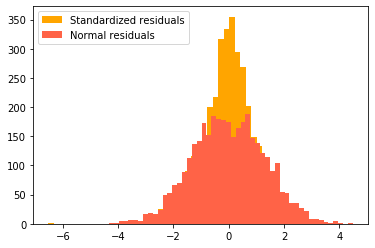

In [42]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# generate normal distribution residuals
normal_resid = np.random.normal(np.mean(returns), np.std(returns), len(returns))

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 50, 
         facecolor = 'orange', label = 'Standardized residuals')
plt.hist(normal_resid, bins = 50, 
         facecolor = 'tomato', label = 'Normal residuals')
plt.legend(loc = 'upper left')
plt.show()

In [29]:
normal_resid = norm.pdf(returns, np.mean(returns), np.std(returns))

In [43]:
# Specify GARCH with student t distribution 
skewt_gm = arch_model(returns, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5121.751556326301
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5117.033185855527
Iteration:      3,   Func. Count:     30,   Neg. LLF: 5112.062402224383
Iteration:      4,   Func. Count:     39,   Neg. LLF: 5105.824108941534
Iteration:      5,   Func. Count:     48,   Neg. LLF: 5102.062646280858
Iteration:      6,   Func. Count:     57,   Neg. LLF: 5095.860140180762
Iteration:      7,   Func. Count:     67,   Neg. LLF: 5095.005128057521
Iteration:      8,   Func. Count:     76,   Neg. LLF: 5093.9959955754475
Iteration:      9,   Func. Count:     85,   Neg. LLF: 5092.930072930265
Iteration:     10,   Func. Count:     95,   Neg. LLF: 5092.847378693687
Iteration:     11,   Func. Count:    104,   Neg. LLF: 5092.608065083068
Iteration:     12,   Func. Count:    112,   Neg. LLF: 5092.554704290638
Iteration:     13,   Func. Count:    120,   Neg. LLF: 5092.548227607854
Iteration:     14,   Func. Count:    128,   Neg. LLF: 5092.5481

In [ ]:
# Print model summary of GARCH with constant mean
print(gm_result.summary())
# Print model summary of GARCH with Student t
print(skewt_result.summary())

# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'Student t Volatility')
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

In [45]:

from collections import OrderedDict

import arch.data.wti

crude = arch.data.wti.load()
crude_ret = 100 * crude.DCOILWTICO.dropna().pct_change().dropna()
res_normal = arch_model(crude_ret).fit(disp='off')
res_t = arch_model(crude_ret, dist='t').fit(disp='off')
res_skewt = arch_model(crude_ret, dist='skewt').fit(disp='off')
lls = pd.Series(
    OrderedDict((('normal', res_normal.loglikelihood),
                 ('t', res_t.loglikelihood), ('skewt',
                                              res_skewt.loglikelihood))))
print(lls)
params = pd.DataFrame(
    OrderedDict((('normal', res_normal.params), ('t', res_t.params),
                 ('skewt', res_skewt.params))))
print(params)

normal   -18165.858870
t        -17919.643916
skewt    -17916.669052
dtype: float64
            normal         t     skewt
alpha[1]  0.085627  0.064980  0.064889
beta[1]   0.909098  0.927950  0.928215
lambda         NaN       NaN -0.036986
mu        0.046682  0.056438  0.040928
nu             NaN  6.178652  6.186528
omega     0.055806  0.048516  0.047683


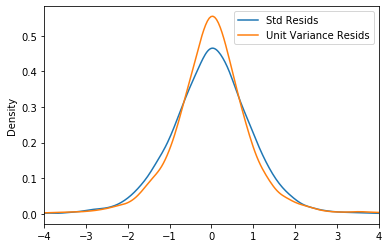

In [46]:
std_resid = res_normal.resid / res_normal.conditional_volatility
unit_var_resid = res_normal.resid / res_normal.resid.std()
df = pd.concat([std_resid, unit_var_resid], 1)
df.columns = ['Std Resids', 'Unit Variance Resids']
subplot = df.plot(kind='kde', xlim=(-4, 4))

In [47]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2014,1,1)
sp500 = web.get_data_yahoo('^GSPC', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

In [48]:
split_date = dt.datetime(2010,1,1)
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3808.2922972597567
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3806.017494295933
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3802.5274034655035
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3793.7358063858605
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3786.9557610679894
Iteration:      6,   Func. Count:     45,   Neg. LLF: 3786.328439482065
Iteration:      7,   Func. Count:     52,   Neg. LLF: 3785.3954722920826
Iteration:      8,   Func. Count:     59,   Neg. LLF: 3784.9389677522754
Iteration:      9,   Func. Count:     66,   Neg. LLF: 3784.656099572095
Iteration:     10,   Func. Count:     73,   Neg. LLF: 3784.6202765403746
Iteration:     11,   Func. Count:     80,   Neg. LLF: 3784.5847666510645
Iteration:     12,   Func. Count:     86,   Neg. LLF: 3784.584427415568
Iteration:     13,   Func. Count:     92,   Neg. LLF: 3784.584380693768
Optimization terminated successfully.    (Exit mode 0)
 

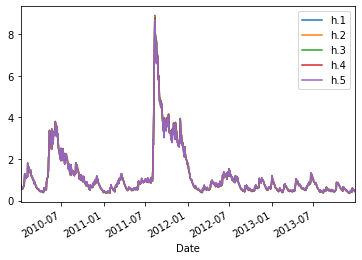

In [49]:
forecasts = res.forecast(horizon=5, start=split_date)
forecasts.variance[split_date:].plot()

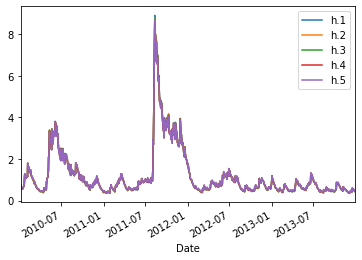

In [50]:
forecasts = res.forecast(horizon=5, start=split_date, method='simulation')
forecasts.variance[split_date:].plot()

In [51]:
print(forecasts.variance.tail())

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2013-12-24  0.489534  0.494896  0.504970  0.511049  0.520877
2013-12-26  0.474691  0.483172  0.493047  0.500522  0.509314
2013-12-27  0.447054  0.453183  0.459181  0.466536  0.473339
2013-12-30  0.421528  0.430492  0.437526  0.446327  0.452942
2013-12-31  0.407544  0.416042  0.424826  0.431095  0.438236
